<a href="https://colab.research.google.com/github/davidofitaly/notes_02_50_key_stats_ds/blob/main/04_chapter/01_raw_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
library(MASS)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Simple Linear Regression

1. **Dependent Variable**:  
   The outcome being predicted. Synonyms: response, $y$, target, result.

2. **Independent Variable**:  
   The predictor or feature used to explain the dependent variable. Synonyms: $x$, attribute, characteristic, predictor.

3. **Intercept (Constant Term)**:  
   The expected value of the dependent variable when the independent variable is zero. Denoted as $b_0$ or $\beta_0$.

4. **Regression Coefficient**:  
   Represents the change in the dependent variable for a one-unit increase in the independent variable. Denoted as $b_1$ or $\beta_1$.

5. **Fitted (Predicted) Values**:  
   The estimated values of the dependent variable. Denoted as $\hat{y}$. Synonyms: forecasted values, approximated values.

6. **Residuals (Error)**:  
   The difference between observed and fitted values:  
   $$ \text{Residual} = y - \hat{y} $$

7. **Least Squares Method**:  
   A technique to minimize the sum of squared residuals and find the best-fitting line:  
   $$ \text{Minimize } \sum (y_i - (\beta_0 + \beta_1 x_i))^2 $$  
   where $\beta_0$ is the intercept, and $\beta_1$ is the regression coefficient.


####Excercise 4.1
#####Write a program that loads the `LungDisease.csv` dataset from the provided URL and performs a linear regression to predict PEFR based on Exposure. Then, display the results of the regression model.

1. **Load the LungDisease dataset** from the provided GitHub URL into a variable called `data_lung`.
2. **Fit a linear regression model** with PEFR as the dependent variable and Exposure as the independent variable.
3. **Display the first few rows** of the dataset using the `head()` function.
4. **Print the results of the regression model**, showing the coefficients for the intercept and Exposure.

In [5]:
# Define the URL of the CSV file on GitHub
url <- "https://raw.githubusercontent.com/davidofitaly/notes_02_50_key_stats_ds/main/04_chapter/files/LungDisease.csv"

# Load the data from the CSV file into the variable 'data_lung'
data_lung <- read.csv(url)

# Display the first few rows of the loaded dataset
head(data_lung)

,PEFR,Exposure
,<int>,<int>
1,390,0
2,410,0
3,430,0
4,460,0
5,420,1
6,280,2


In [6]:
# Fit linear regression model with PEFR as dependent and Exposure as independent variable
# lm() fits a linear model. PEFR is predicted by Exposure in data_lung.
model <- lm(PEFR ~ Exposure, data=data_lung)

# Print the results
print(model)


Call:
lm(formula = PEFR ~ Exposure, data = data_lung)

Coefficients:
(Intercept)     Exposure  
    424.583       -4.185  



####Exercise 4.2

#####Based on the linear regression model you have created (`model`), follow these steps:

1. **Generate the Predicted Values:**  
   Use the model to calculate the predicted **PEFR** values based on the **Exposure** variable. These predicted values represent the expected **PEFR** for each data point according to the model.

2. **Calculate the Residuals:**  
   The residuals represent the difference between the observed **PEFR** values and the predicted values. Compute these residuals by subtracting the predicted values from the actual **PEFR** values.

3. **Display the Results:**  

In [7]:
# Generate the predicted values (fitted values) based on the regression model
fitted <- predict(model)

# Calculate the residuals, i.e., the differences between the actual and predicted values
resid <- residuals(model)

# Display the first few predicted values
print(head(fitted))

# Display the first few residuals (errors)
print(head(resid))


       1        2        3        4        5        6 
424.5828 424.5828 424.5828 424.5828 420.3982 416.2137 
           1            2            3            4            5            6 
 -34.5828066  -14.5828066    5.4171934   35.4171934   -0.3982301 -136.2136536 


### Multiple Regression

##### Multiple Regression  

1. **Root Mean Squared Error (RMSE)**  
   Measures the model’s prediction error:  
   $$ RMSE = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2} $$  
   - $n$ – number of observations (data points).  
   - Lower RMSE → better model accuracy.  
   - RMSE in the same unit as $y$.  

2. **Residual Standard Error (RSE)**  
   Estimates the standard deviation of residuals:  
   $$ RSE = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{n - p - 1}} $$  
   - $p$ – number of independent variables (predictors).  
   - Lower RSE → model fits data well.  
   - Used for confidence interval estimation.  

3. **R-Squared ($R^2$)**  
   Explains the proportion of variance in $y$ explained by predictors:  
   $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$  
   - $SS_{res}$ – sum of squared residuals (errors).  
   - $SS_{tot}$ – total sum of squares (variance in $y$).  
   - Closer to 1 → better model fit.  
   - $R^2 = 0.8$ → 80% of variance explained.  

4. **t-Statistic**  
   Assesses the significance of each regression coefficient:  
   $$ t = \frac{\beta_j}{SE_{\beta_j}} $$  
   - $\beta_j$ – estimated coefficient for predictor $j$.  
   - $SE_{\beta_j}$ – standard error of $\beta_j$.  
   - Higher absolute $t$-value → stronger evidence against $H_0$ (no effect).  
   - Used in hypothesis testing.  

5. **Weighted Regression**  
   Accounts for heteroscedasticity by assigning weights $w_i$:  
   $$ \min \sum w_i (y_i - \hat{y}_i)^2 $$  
   - Gives more influence to reliable observations.  
   - Useful when residual variance is not constant.  



#### Exercise 4.3
##### Write a program that loads the `house_sales.csv` dataset from the provided GitHub URL and performs a linear regression to predict `AdjSalePrice` based on several independent variables. Then, display the results of the regression model.

1. **Load the `house_sales` dataset** from the provided GitHub URL into a variable called `data_house`, ensuring the separator is set to tab (`\t`).
2. **Fit a linear regression model** with `AdjSalePrice` as the dependent variable and `SqFtTotLiving`, `SqFtLot`, `Bathrooms`, `Bedrooms`, and `BldgGrade` as independent variables.
3. **Display the first few rows** of the dataset, showing only the selected columns: `AdjSalePrice`, `SqFtTotLiving`, `SqFtLot`, `Bathrooms`, `Bedrooms`, and `BldgGrade`.
4. **Print the results of the regression model**, showing the coefficients for the intercept and each of the independent variables.


In [37]:
# Define the URL of the CSV file on GitHub
url <- "https://raw.githubusercontent.com/davidofitaly/notes_02_50_key_stats_ds/main/04_chapter/files/house_sales.csv"

# Load the data from the CSV file into the variable 'data_house'
# Specify the separator as tab ('\t') to correctly read the file
data_house <- read.csv(url, sep="\t")

# Display the first few rows of selected columns from the dataset
head(data_house[, c("AdjSalePrice", "SqFtTotLiving", "SqFtLot",
                          "Bathrooms", "Bedrooms", "BldgGrade")])


print(head(data_house))

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,300805,2400,9373,3.00,6,7
2,1076162,3764,20156,3.75,4,10
3,761805,2060,26036,1.75,4,8
4,442065,3200,8618,3.75,5,7
5,297065,1720,8620,1.75,4,7
6,411781,930,1012,1.50,2,8


  DocumentDate SalePrice PropertyID  PropertyType         ym zhvi_px  zhvi_idx
1   2014-09-16    280000    1000102     Multiplex 2014-09-01  405100 0.9308364
2   2006-06-16   1000000    1200013 Single Family 2006-06-01  404400 0.9292279
3   2007-01-29    745000    1200019 Single Family 2007-01-01  425600 0.9779412
4   2008-02-25    425000    2800016 Single Family 2008-02-01  418400 0.9613971
5   2013-03-29    240000    2800024 Single Family 2013-03-01  351600 0.8079044
6   2009-03-30    349900    3600090     Townhouse 2009-03-01  369800 0.8497243
  AdjSalePrice NbrLivingUnits SqFtLot SqFtTotLiving SqFtFinBasement Bathrooms
1       300805              2    9373          2400               0      3.00
2      1076162              1   20156          3764            1452      3.75
3       761805              1   26036          2060             900      1.75
4       442065              1    8618          3200            1640      3.75
5       297065              1    8620          1720      

In [9]:
# Fit a linear regression model to predict AdjSalePrice using several independent variables
house_lm <- lm(AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + BldgGrade, data=data_house, na.action = na.omit)

# Print the model summary
house_lm


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade, data = data_house, na.action = na.omit)

Coefficients:
  (Intercept)  SqFtTotLiving        SqFtLot      Bathrooms       Bedrooms  
   -5.219e+05      2.288e+02     -6.051e-02     -1.944e+04     -4.778e+04  
    BldgGrade  
    1.061e+05  


#### Exercise 4.4
##### Based on the `house_lm` model, perform the following tasks:

1. **View the summary of the model** by running the `summary(house_lm)` function. This will provide detailed information about the regression results, including coefficients, R-squared value, p-values, and significance of the predictors.
2. **Interpret the coefficients** in the context of the model. Understand how each predictor (such as `SqFtTotLiving`, `Bathrooms`, `Bedrooms`, etc.) influences the predicted `AdjSalePrice`.
3. **Examine the R-squared value** to assess the goodness of fit of the model. Determine how well the independent variables explain the variance in the dependent variable (`AdjSalePrice`).



In [10]:
# Set the option to prevent scientific notation in the output
options(scipen = 999)

# Display the summary of the linear regression model 'house_lm'
summary(house_lm)



Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + 
    Bedrooms + BldgGrade, data = data_house, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-1199508  -118879   -20982    87414  9472982 

Coefficients:
                   Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)   -521924.72204   15650.57362 -33.349 < 0.0000000000000002 ***
SqFtTotLiving     228.83211       3.89837  58.699 < 0.0000000000000002 ***
SqFtLot            -0.06051       0.06118  -0.989                0.323    
Bathrooms      -19438.09896    3625.21876  -5.362         0.0000000832 ***
Bedrooms       -47781.15338    2489.44263 -19.194 < 0.0000000000000002 ***
BldgGrade      106117.20956    2396.13627  44.287 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 261200 on 22683 degrees of freedom
Multiple R-squared:  0.5407,	Adjusted R-squared:  0.5406 
F-statistic:  5340 on 5 and 22

#### Exercise 4.5

#####Based on the linear regression model `house_lm`, apply stepwise regression using AIC to select the best model. Use the `stepAIC()` function and set the `direction` argument to `"both"` to allow both forward and backward selection.


In [11]:
# Perform stepwise regression using AIC to select the best model
step_lm <- stepAIC(house_lm, direction = "both")

# Display the results of the stepwise regression
step_lm


Start:  AIC=566015.4
AdjSalePrice ~ SqFtTotLiving + SqFtLot + Bathrooms + Bedrooms + 
    BldgGrade

                Df       Sum of Sq              RSS    AIC
- SqFtLot        1     66750141148 1548148631912860 566014
<none>                             1548081881771712 566015
- Bathrooms      1   1962151674312 1550044033446024 566042
- Bedrooms       1  25142151935270 1573224033706983 566379
- BldgGrade      1 133857297270080 1681939179041792 567895
- SqFtTotLiving  1 235159007954810 1783240889726523 569222

Step:  AIC=566014.3
AdjSalePrice ~ SqFtTotLiving + Bathrooms + Bedrooms + BldgGrade

                Df       Sum of Sq              RSS    AIC
<none>                             1548148631912861 566014
+ SqFtLot        1     66750141148 1548081881771712 566015
- Bathrooms      1   1928307868978 1550076939781839 566041
- Bedrooms       1  25075461022645 1573224092935506 566377
- BldgGrade      1 133921425601500 1682070057514361 567895
- SqFtTotLiving  1 239771505547382 17879201374


Call:
lm(formula = AdjSalePrice ~ SqFtTotLiving + Bathrooms + Bedrooms + 
    BldgGrade, data = data_house, na.action = na.omit)

Coefficients:
  (Intercept)  SqFtTotLiving      Bathrooms       Bedrooms      BldgGrade  
    -522415.7          228.2       -19240.4       -47650.5       106138.4  


###Prediction Using Regression  

1. **Prediction Interval**  
   A **prediction interval** provides a range within which a future observation is expected to fall with a given probability. It accounts for both model uncertainty and the natural variability of the data.  
   $$ \hat{y} \pm t_{\alpha/2, n-p-1} \cdot SE_{\text{pred}} $$  
   where:  
   - $\hat{y}$ is the predicted value,  
   - $t_{\alpha/2, n-p-1}$ is the critical value from the t-distribution,  
   - $SE_{\text{pred}}$ is the standard error of prediction.  
   Key point: Prediction intervals are wider than confidence intervals because they include future variability.  

2. **Extrapolation**  
   **Extrapolation** occurs when a model is used to predict values outside the range of the training data. This can lead to unreliable predictions because the relationship between variables may not hold beyond observed values.  
   - **Safe range**: Predictions are more reliable when made within the range of the training data (interpolation).  
   - **Risk**: Extrapolating far beyond observed values increases the likelihood of significant errors.  


#### Exercise 4.6

#####Based on the linear regression model `house_lm`, perform the following tasks:

1. **Make predictions**:  
   - Use the `predict()` function to estimate `AdjSalePrice` for new observations with specified values of `SqFtTotLiving`, `SqFtLot`, `Bathrooms`, `Bedrooms`, and `BldgGrade`.  
   - Store the predicted values in a variable called `predicted_prices`.

2. **Calculate a prediction interval**:  
   - Generate a **prediction interval** for the new observations, providing both lower and upper bounds for possible sale prices.  
   - Store the results in a variable called `prediction_intervals`.

3. **Interpret the results**:  
   - Compare the predicted values with their prediction intervals.  
   - Discuss the reliability of these predictions and the importance of prediction intervals in regression models.  

In [33]:
# Define new observations (example houses)
new_houses <- data.frame(
  SqFtTotLiving = c(2000, 2500),
  SqFtLot = c(5000, 7000),
  Bathrooms = c(2, 3),
  Bedrooms = c(3, 4),
  BldgGrade = c(7, 8)
)

# Make predictions for new houses
predicted_prices <- predict(house_lm, newdata = new_houses)

# Generate prediction intervals
prediction_intervals <- predict(house_lm, newdata = new_houses, interval = "prediction")

# Display the results
print(predicted_prices)
print(prediction_intervals)


       1        2 
496037.8 649230.8 
       fit      lwr     upr
1 496037.8 -16042.3 1008118
2 649230.8 137143.9 1161318


#### Exercise 4.7

**Visualization** of the linear regression model:

1. **Plot the regression line** along with the **prediction intervals** for new observations.
2. **Highlight the predicted points** on the graph.



  SqFtTotLiving PredictedPrice    Lower   Upper
1          2000       496037.8 -16042.3 1008118
2          2500       649230.8 137143.9 1161318


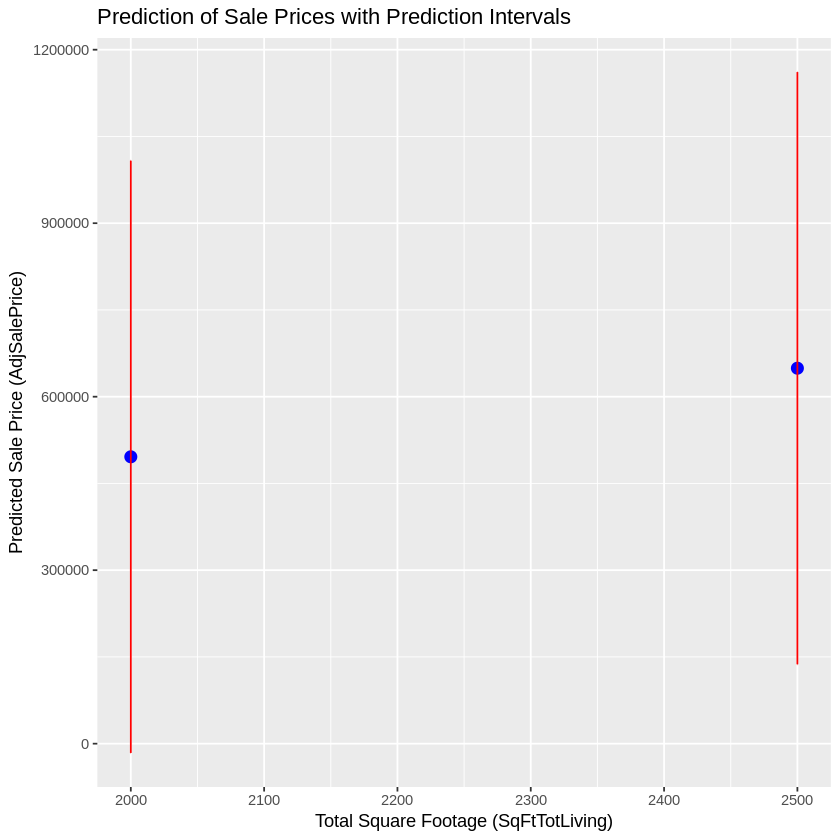

In [34]:
# Prepare data for the plot
plot_data <- data.frame(
  SqFtTotLiving = new_houses$SqFtTotLiving,  # Total square footage
  PredictedPrice = predicted_prices,  # Predicted prices
  Lower = prediction_intervals[, "lwr"],  # Lower bound of the interval
  Upper = prediction_intervals[, "upr"]   # Upper bound of the interval
)

# Check that the data has only two points
print(plot_data)

# Create the plot (only points for predicted prices and error bars for intervals)
ggplot(plot_data, aes(x = SqFtTotLiving, y = PredictedPrice)) +
  geom_point(color = "blue", size = 3) +  # Points for the predicted prices
  geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2, color = "red") +  # Prediction intervals as error bars
  labs(title = "Prediction of Sale Prices with Prediction Intervals",  # Title of the plot
       x = "Total Square Footage (SqFtTotLiving)",  # X-axis label
       y = "Predicted Sale Price (AdjSalePrice)")  # Y-axis label




###Categorical Variables in Regression

#####Categorical variables in regression require special handling, as regression models such as linear regression expect numerical data. Several methods are commonly used to include categorical variables in regression models:

##### 1. Dummy Variable
- **Definition**: A dummy variable is a binary variable (0 or 1) that represents a category. Each category of a categorical variable is represented by a separate dummy variable, where the variable takes a value of 1 if the observation belongs to that category, or 0 if it does not.

- **Example**: For a variable "Color" with categories "Red", "Blue", and "Green", we create three dummy variables:  
  - `Color_Red` (1 if the color is Red, 0 otherwise)
  - `Color_Blue` (1 if the color is Blue, 0 otherwise)
  - `Color_Green` (1 if the color is Green, 0 otherwise)

##### 2. Reference Coding
- **Definition**: Reference coding involves selecting one category as the "reference" (baseline) and coding it as 0 in the dummy variable. The remaining categories are represented as dummy variables with a value of 1 or 0.
  
- **Example**: For the "Color" variable with categories "Red", "Blue", and "Green", we can select "Red" as the reference category. Reference coding would look like:
  - `Color_Blue` (1 if the color is Blue, 0 otherwise)
  - `Color_Green` (1 if the color is Green, 0 otherwise)
  
  The "Red" category is implicitly represented by the value 0 in both dummy variables. This approach avoids redundancy and reduces the number of variables.

##### 3. One-Hot Encoding
- **Definition**: One-hot encoding involves creating dummy variables for each category of a categorical variable. Each category is represented by a separate binary variable, where the value is 1 if the observation belongs to that category, and 0 if it does not.
  
- **Example**: For the "Color" variable with categories "Red", "Blue", and "Green", one-hot encoding would look like:
  - `Color_Red` (1 if the color is Red, 0 otherwise)
  - `Color_Blue` (1 if the color is Blue, 0 otherwise)
  - `Color_Green` (1 if the color is Green, 0 otherwise)
  
  All categories are represented by binary variables.

##### 4. Deviation Coding
- **Definition**: Deviation coding (also called sum coding) is similar to reference coding, but instead of coding the reference category as 0, we assign it a central value (such as the mean or median). The remaining categories are represented by dummy variables.

- **Example**: For the "Color" variable with categories "Red", "Blue", and "Green", in deviation coding, all categories are represented by binary variables, and the reference category could take the mean value for the variable across the dataset. This method helps avoid the introduction of too many additional variables while still capturing differences relative to the central value.


####Exercise 4.8


1. **Use one-hot encoding** (via `model.matrix`) to convert the `PropertyType` column into a set of binary dummy variables.
2. **Exclude the intercept** term by using `-1` in the formula to avoid multicollinearity.
3. **Display the first few rows** of the resulting dummy variable matrix.
4. **Interpret the matrix**: Explain what each column represents and how it encodes the original `PropertyType` information.

In [61]:
# Display the first few rows of the 'PropertyType' column from the 'data_house' dataset
head(data_house[, 'PropertyType'])

# Apply model.matrix to convert the 'PropertyType' column into dummy (binary) variables
# The '~' indicates we are creating dummy variables for 'PropertyType'
# The result will have a column for each category (e.g., 'Single Family', 'Townhouse', etc.)
prop_type_dummies <- model.matrix(~PropertyType, data=data_house)

# Display the first few rows of the dummy variable matrix for 'PropertyType'
# Each category of 'PropertyType' will be represented as a separate column with 0 or 1 values
head(prop_type_dummies)


[1] "Multiplex"     "Single Family" "Single Family" "Single Family"
[5] "Single Family" "Townhouse"

,(Intercept),PropertyTypeSingle Family,PropertyTypeTownhouse
1,1,0,0
2,1,1,0
3,1,1,0
4,1,1,0
5,1,1,0
6,1,0,1


### Interpretation of Regression Equation

#####In regression analysis, the goal is to understand the relationship between dependent and independent variables. However, there are several key concepts that help interpret regression equations effectively:

1. **Correlated Variables**
   - Correlation refers to the degree to which two or more variables are related. In regression analysis, it's important to identify if the independent variables are correlated because highly correlated variables can distort the interpretation of their individual effects.
   - For instance, if two predictors (e.g., age and income) are highly correlated, it becomes difficult to separate their individual impacts on the dependent variable.

2. **Multicollinearity**
   - Multicollinearity occurs when two or more predictors in the regression model are highly correlated. This can cause problems because it makes it hard to assess the individual effect of each predictor on the dependent variable.
   - Symptoms of multicollinearity include inflated standard errors for coefficients and unstable coefficient estimates.
   - It can be detected using Variance Inflation Factor (VIF) or correlation matrices. If VIF values are large (typically > 10), it indicates multicollinearity.

3. **Confounding Variables**
   - A confounding variable is one that affects both the independent variable and the dependent variable, creating a false impression of the relationship between them.
   - For example, in a study measuring the relationship between exercise and weight loss, a confounding variable like diet could influence the results. Therefore, it's important to control for confounding variables to make valid interpretations.

4. **Main Effects**  
   The direct impact of an independent variable on the dependent variable, assuming other variables are constant.

5. **Interactions**  
   When the effect of one predictor depends on another. Interaction terms in a model show how relationships change based on the value of other variables.
